In [8]:
!pip install cerberus > /dev/null

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip


# Data Quality and Validation

Data quality and validation are critical components in the data engineering process. It ensures that the data utilized in analytics and decision-making is accurate, reliable, and consistent. Here, we will delve into the significance of data quality and validation in data engineering, explore various techniques available in Python for data validation, and examine the best practices to incorporate data quality checks in data pipelines.

## Importance of Data Quality and Validation in Data Engineering

1. **Reliability**: Ensuring data quality helps in maintaining the reliability of the data, which in turn aids in building trust with the stakeholders.
   
2. **Decision Making**: High-quality data is pivotal in making informed decisions. It helps in deriving meaningful insights from the data.

3. **Compliance**: Maintaining data quality is often a regulatory requirement in many industries, ensuring that the data adheres to the necessary standards and compliances.

4. **Efficiency**: Data validation helps in eliminating errors and inconsistencies, which can lead to more efficient data processing and analysis.

## Techniques for Validating and Ensuring Data Quality in Python

### Data Profiling
Data profiling is the process of examining, analyzing, and reviewing data to collect statistics and information about data. Python offers various libraries such as `pandas-profiling` that can be used for data profiling.

### Data Validation Frameworks
There are several frameworks available in Python for data validation, such as `Pydantic` and `Cerberus`, which help in validating the data against predefined schemas and rules.

## Best Practices for Incorporating Data Quality Checks in Data Pipelines

1. **Automated Testing**: Incorporate automated testing in the data pipelines to continuously monitor the quality of the data.
   
2. **Anomaly Detection**: Implement anomaly detection to identify any unusual patterns or outliers in the data.

3. **Version Control**: Utilize version control systems to track changes in the data and maintain a history of data transformations.

4. **Documentation**: Maintain comprehensive documentation of the data pipelines, including the data sources, transformations, and data quality checks implemented.

In the following sections, we will explore each of these subtopics in detail, with Python code examples and practical applications.

---

### 1. Reliability

Ensuring data quality is essential in maintaining the reliability of data. Reliable data forms the backbone of robust analytical systems, fostering trust with stakeholders and facilitating accurate insights. It represents the real-world phenomena accurately and consistently over time. Below, we demonstrate a Python example of how maintaining data reliability is crucial in data engineering:

#### Python Example: 
In this Python example, we illustrate how to identify and handle missing values in a dataset, a fundamental step in maintaining data reliability.


In [5]:
import pandas as pd
import numpy as np

# Load the Pima Indians Diabetes dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(data_url, header=None)

# Adding column names for better understanding
data.columns = ["Number of times pregnant", "Plasma glucose concentration", "Diastolic blood pressure", "Triceps skinfold thickness", "2-Hour serum insulin", "Body mass index", "Diabetes pedigree function", "Age", "Class"]

# Identify missing values (in this dataset, a value of 0 in certain columns indicates a missing value)
missing_values_before = (data[["Plasma glucose concentration", "Diastolic blood pressure", "Triceps skinfold thickness", "2-Hour serum insulin", "Body mass index"]] == 0).sum()
print(f"Missing values before cleaning:\n{missing_values_before}")

# Handle missing values by replacing zeros with NaN and then imputing the median value
data.replace({col: 0 for col in ["Plasma glucose concentration", "Diastolic blood pressure", "Triceps skinfold thickness", "2-Hour serum insulin", "Body mass index"]}, np.nan, inplace=True)
data.fillna(data.median(), inplace=True)

# Verify that there are no missing values left (indicated by zeros)
missing_values_after = (data[["Plasma glucose concentration", "Diastolic blood pressure", "Triceps skinfold thickness", "2-Hour serum insulin", "Body mass index"]] == 0).sum()
print(f"\n\nMissing values after cleaning:\n{missing_values_after}")

# Assert to verify no missing values
assert missing_values_after.sum() == 0

Missing values before cleaning:
Plasma glucose concentration      5
Diastolic blood pressure         35
Triceps skinfold thickness      227
2-Hour serum insulin            374
Body mass index                  11
dtype: int64


Missing values after cleaning:
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skinfold thickness      0
2-Hour serum insulin            0
Body mass index                 0
dtype: int64


<br>
<div class="alert alert-info" role="alert">
In this script, we used the pandas library to load the Pima Indians Diabetes dataset, identified missing values (indicated by zeros in certain columns), and handled them by replacing with NaN and then imputing the median value, thereby ensuring the reliability of the dataset.

In the upcoming section, we will explore how data quality and validation contribute to informed decision-making.
</div>

### 2. Decision Making

High-quality data is pivotal in making informed decisions. It assists in deriving meaningful insights from the data, which leads to accurate and data-driven decision-making. A well-structured data analysis process can help identify trends, patterns, and correlations that are not immediately apparent. Let's explore a Python example where we use data visualization to aid in decision-making:

#### Python Example:
In this Python script, we demonstrate how to perform data aggregation and visualization to assist in decision-making. We will continue using the "Pima Indians Diabetes" dataset.

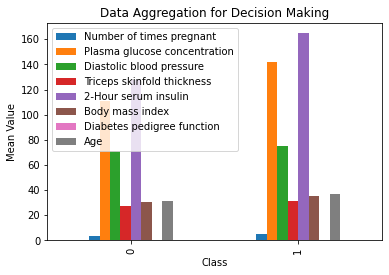

In [6]:
import matplotlib.pyplot as plt

# Group data by the outcome (Class) and calculate the mean value for each group
grouped_data = data.groupby('Class').mean()

# Visualize the aggregated data using a bar plot
grouped_data.plot(kind='bar')
plt.title('Data Aggregation for Decision Making')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.show()

<br>
<div class="alert alert-info" role="alert">
This script groups the data by the 'Class' column (which indicates whether or not a person has diabetes) and calculates the mean value for each group. The resulting bar plot visualizes the average values of different attributes for each class, aiding in the analysis and decision-making process regarding diabetes prediction.
</div>

### 3. Compliance

Compliance refers to the adherence to standards, regulations, and laws that govern the collection and usage of data. Ensuring data quality is often a regulatory requirement in many industries, helping to maintain the necessary standards and compliance. It safeguards the organization from legal ramifications and maintains the trust of stakeholders. Let's delve into a Python example that illustrates how to validate data against a predefined schema to ensure compliance with data standards:

#### Python Example:
In this Python script, we illustrate how to validate data records against a predefined schema using the `Cerberus` library, thereby ensuring that the data meets the necessary standards and compliances.


In [9]:
from cerberus import Validator

# Define a schema to validate data against
schema = {
    'Number of times pregnant': {'type': 'integer', 'min': 0},
    'Plasma glucose concentration': {'type': 'integer', 'min': 0},
    'Diastolic blood pressure': {'type': 'integer', 'min': 0},
    'Triceps skinfold thickness': {'type': 'integer', 'min': 0},
    '2-Hour serum insulin': {'type': 'integer', 'min': 0},
    'Body mass index': {'type': 'float', 'min': 0.0},
    'Diabetes pedigree function': {'type': 'float', 'min': 0.0},
    'Age': {'type': 'integer', 'min': 0},
    'Class': {'type': 'integer', 'min': 0, 'max': 1}
}

# Create a validator instance
v = Validator(schema)

# Validate a data record against the schema
record = data.iloc[0].to_dict()
is_valid = v.validate(record)
print(f"Record validation result: {is_valid}")

# If there are any errors, print them
if not is_valid:
    print(v.errors)

Record validation result: False
{'2-Hour serum insulin': ['must be of integer type'], 'Age': ['must be of integer type'], 'Class': ['must be of integer type'], 'Diastolic blood pressure': ['must be of integer type'], 'Number of times pregnant': ['must be of integer type'], 'Plasma glucose concentration': ['must be of integer type'], 'Triceps skinfold thickness': ['must be of integer type']}


<br>
<div class="alert alert-success" role="alert">
    
**Note on Cerberus Library:**

Cerberus is an open-source data validation library used extensively in Python for validating data schemas. It allows developers to validate data records against predefined schemas with various validation rules, helping to ensure that the data meets the necessary standards and compliances. Using Cerberus can significantly streamline the process of data validation, making it an essential tool in data engineering pipelines where compliance with data standards is a critical requirement.

</div>

<br>
<div class="alert alert-info" role="alert">This script uses the Cerberus library to define a validation schema based on the attributes present in the Pima Indians Diabetes dataset. It then validates a data record against this schema, printing the validation result and any errors if present. This process ensures that the data adheres to the defined standards, showcasing the importance of compliance in data quality and validation.</div>

### 4. Efficiency

Efficiency in data processing and analysis is crucial in data engineering. Data validation aids in enhancing efficiency by eliminating errors and inconsistencies, which, in turn, leads to smoother data processing and analysis. It helps in saving resources and time, allowing for quicker insights and decision-making. Let's explore a Python example that illustrates how to enhance data efficiency through data cleaning operations:

#### Python Example:
In this Python script, we demonstrate how to perform data cleaning operations such as removing duplicates and irrelevant columns to enhance data efficiency, using the Pima Indians Diabetes dataset.


In [10]:
# Identify and remove duplicate records
duplicate_records = data.duplicated().sum()
print(f"Number of duplicate records: {duplicate_records}")
data.drop_duplicates(inplace=True)

# Remove irrelevant columns (for this example, we consider 'Diabetes pedigree function' as an irrelevant column)
data.drop(columns=['Diabetes pedigree function'], inplace=True)

# Verify the changes
print(f"Number of records after removing duplicates: {data.shape[0]}")
print(f"Columns after removing irrelevant columns: {data.columns.tolist()}")

Number of duplicate records: 0
Number of records after removing duplicates: 768
Columns after removing irrelevant columns: ['Number of times pregnant', 'Plasma glucose concentration', 'Diastolic blood pressure', 'Triceps skinfold thickness', '2-Hour serum insulin', 'Body mass index', 'Age', 'Class']


<div class="alert alert-success" role="alert">

**Efficiency Tip:**

Regular data cleaning and validation checks can significantly enhance the efficiency of data pipelines, ensuring that the data is always ready for analysis and modeling without requiring extensive preprocessing steps each time.

</div>
<br>

<div class="alert alert-info" role="alert">This script identifies and removes duplicate records and irrelevant columns from the dataset, thereby enhancing the efficiency of data processing. It helps in maintaining a clean and streamlined dataset, which is fundamental for efficient data analysis and modeling.

In the next sections, we will delve deeper into various techniques for validating and ensuring data quality in Python, complemented with Python code examples and practical applications.</div>

## Techniques for Validating and Ensuring Data Quality in Python

Data quality is a comprehensive process that involves various techniques to ensure the reliability, accuracy, and completeness of data. In this section, we will explore different techniques and Python tools that can be used to validate and ensure data quality.

### Data Profiling

Data profiling is the process of examining and analyzing data to gather statistics and information about it. It helps in understanding the data better, identifying any patterns, anomalies, or inconsistencies present in the data. Data profiling is a critical step in data preparation, offering insights into the data's quality and characteristics. Let's delve into a Python example where we demonstrate data profiling using the `pandas_profiling` library on the Pima Indians Diabetes dataset:

#### Python Example:

Before we begin, ensure to install the required library by using the following command:


In [18]:
!pip install sweetviz > /dev/null

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [19]:
import pandas as pd
import sweetviz as sv

# Load the Pima Indians Diabetes dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(data_url, header=None)
data.columns = ["Number of times pregnant", "Plasma glucose concentration", "Diastolic blood pressure", "Triceps skinfold thickness", "2-Hour serum insulin", "Body mass index", "Diabetes pedigree function", "Age", "Class"]

# Data Transformation: Creating a new feature 'Age Group'
data['Age Group'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Data Profiling: Creating a data profiling report
report = sv.analyze(data)

# Display the data profiling report
report.show_html('report.html')

                                             |                                                                …

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<br>

<div class="alert alert-info" role="alert">The data profiling report generated by sweetviz will offer a comprehensive overview of the data, including insights into data distributions, correlations, and other statistical measures. It serves as a powerful tool in the early stages of data analysis, helping in identifying areas where further data engineering steps might be necessary.</div>

### Data Validation Frameworks

Data validation frameworks play a vital role in ensuring the accuracy and reliability of the data in data engineering pipelines. These frameworks allow for the validation of data against predefined schemas or rules, ensuring that the data meets the necessary standards and compliances. In Python, several frameworks facilitate data validation, including `Pydantic`, `Cerberus`, and `Pandas Schema`. In this section, we will explore how to use the `Pydantic` library for data validation, including creating data models and validating data records against these models. We will also introduce some additional data engineering steps such as data cleaning and transformation.

#### Python Example:

First, install the `pydantic` library using the following command:

In [20]:
!pip install pydantic > /dev/null

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [27]:
from pydantic import BaseModel, ValidationError, conint, confloat
import pandas as pd

# Define a data model using Pydantic
class DiabetesRecord(BaseModel):
    times_pregnant: conint(ge=0)
    glucose_concentration: confloat(ge=0.0)
    blood_pressure: confloat(ge=0.0)
    skinfold_thickness: confloat(ge=0.0)
    serum_insulin: confloat(ge=0.0)
    bmi: confloat(ge=0.0)
    diabetes_pedigree: confloat(ge=0.0)
    age: conint(ge=0)
    classification: conint(ge=0)

# Load the Pima Indians Diabetes dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(data_url, header=None)
data.columns = ["times_pregnant", "glucose_concentration", "blood_pressure", "skinfold_thickness", "serum_insulin", "bmi", "diabetes_pedigree", "age", "classification"]

# Data Transformation: Normalizing the glucose_concentration column
data['glucose_concentration'] = data['glucose_concentration'] / data['glucose_concentration'].max()

# Intentionally introduce some invalid values
data.at[0, 'glucose_concentration'] = -1.0
data.at[1, 'age'] = -5

# Data Validation: Validating records against the defined data model
invalid_records = []
for idx, record in data.iterrows():
    try:
        DiabetesRecord(**record.to_dict())
    except ValidationError as e:
        invalid_records.append((idx, str(e)))

# Print invalid records
for idx, error in invalid_records:
    print(f"Record at index {idx} is invalid: {error}")

Record at index 0 is invalid: 1 validation error for DiabetesRecord
glucose_concentration
  Input should be greater than or equal to 0 [type=greater_than_equal, input_value=-1.0, input_type=float]
    For further information visit https://errors.pydantic.dev/2.6/v/greater_than_equal
Record at index 1 is invalid: 1 validation error for DiabetesRecord
age
  Input should be greater than or equal to 0 [type=greater_than_equal, input_value=-5.0, input_type=float]
    For further information visit https://errors.pydantic.dev/2.6/v/greater_than_equal


<br>

<div class="alert alert-info" role="alert">This section provides a detailed demonstration of using data validation frameworks in Python, showcasing how data models can be created and used to validate data records, ensuring data quality and compliance with expected standards. It also introduces data transformation steps, highlighting the interconnectedness of data validation and data engineering in the data preparation process.
</div>